# CIFAR-10 CNN – Paso 1: entorno + datos

/content
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Formas iniciales: (50000, 32, 32, 3) (10000, 32, 32, 3)
Train/Valid: (40000, 32, 32, 3) (10000, 32, 32, 3)


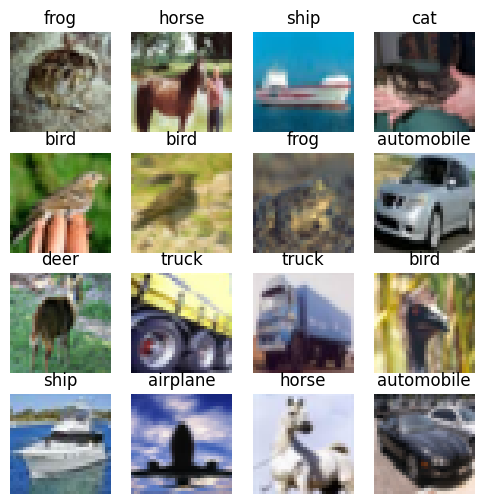

✅ Paso 1 listo. Subimos a GitHub.


In [ ]:
# 0. Librerías
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt, os, json, hashlib, datetime, sklearn.model_selection, yaml
from google.colab import files
import sys

# 1. Fijar semillas
seed = 42
tf.keras.utils.set_random_seed(seed)
np.random.seed(seed)

# 2. Crear carpetas locales
!mkdir -p notebooks results figuras outputs env
%cd /content

# 3. Versiones
versions = {
    "python": sys.version.split()[0],
    "tensorflow": tf.__version__,
    "gpu": tf.config.list_physical_devices('GPU') != []
}
with open("env/ENVIRONMENT.md", "w") as f:
    f.write(f"- Python: {versions['python']}\n- TensorFlow: {versions['tensorflow']}\n- GPU: {versions['gpu']}\n")

# 4. Cargar CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Formas iniciales:", x_train_full.shape, x_test.shape)

# 5. Split 80/20 estratificado
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=seed, stratify=y_train_full)
print("Train/Valid:", x_train.shape, x_valid.shape)

# 6. Normalizar [0,1] + one-hot
x_train, x_valid, x_test = x_train/255., x_valid/255., x_test/255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

# 7. Visualizar 16 imágenes
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.savefig("figuras/muestras_cifar10.png", dpi=150)
plt.show()

# 8. Hash de datos (trazabilidad)
def quick_hash(arr):
    return hashlib.sha256(arr[:1024].tobytes()).hexdigest()[:16]
meta = {
    "x_train_shape": x_train.shape,
    "x_valid_shape": x_valid.shape,
    "x_test_shape":  x_test.shape,
    "hash_train": quick_hash(x_train),
    "timestamp": str(datetime.datetime.now())
}
with open("results/data_meta.json", "w") as f:
    json.dump(meta, f, indent=2)

# 9. params.yaml inicial
params = {"seed": seed, "model": "por_definir", "augment": False, "lr": 1e-3, "batch": 64}
with open("results/params.yaml", "w") as f:
    yaml.dump(params, f)

print("✅ Paso 1 listo. Subimos a GitHub.")

In [ ]:
# -------------------------------------------------
#  RED DENSA BASELINE (MLP) – Prompt 2
# -------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=10,
                    batch_size=64,
                    verbose=2)

# ---------- guardar resultados ----------
import pandas as pd, json
pd.DataFrame(history.history).to_csv("results/history_mlp.csv", index=False)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
metrics = {"val_acc":  max(history.history['val_accuracy']),
           "test_acc": test_acc,
           "val_loss": min(history.history['val_loss']),
           "test_loss": test_loss}
with open("results/metrics_mlp.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("MLP terminado – test accuracy:", test_acc)
model.summary()  # opcional: ver nº de parámetros


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 - 12s - 20ms/step - accuracy: 0.1677 - loss: 2.1755 - val_accuracy: 0.2286 - val_loss: 2.0570
Epoch 2/10
625/625 - 10s - 16ms/step - accuracy: 0.1874 - loss: 2.1027 - val_accuracy: 0.2551 - val_loss: 2.0043
Epoch 3/10
625/625 - 13s - 20ms/step - accuracy: 0.1900 - loss: 2.0940 - val_accuracy: 0.2647 - val_loss: 1.9942
Epoch 4/10
625/625 - 9s - 14ms/step - accuracy: 0.1936 - loss: 2.0826 - val_accuracy: 0.2619 - val_loss: 1.9760
Epoch 5/10
625/625 - 11s - 17ms/step - accuracy: 0.1978 - loss: 2.0698 - val_accuracy: 0.2811 - val_loss: 1.9671
Epoch 6/10
625/625 - 10s - 16ms/step - accuracy: 0.2024 - loss: 2.0625 - val_accuracy: 0.2961 - val_loss: 1.9512
Epoch 7/10
625/625 - 9s - 14ms/step - accuracy: 0.2118 - loss: 2.0557 - val_accuracy: 0.3018 - val_loss: 1.9354
Epoch 8/10
625/625 - 10s - 16ms/step - accuracy: 0.2151 - loss: 2.0399 - val_accuracy: 0.3147 - val_loss: 1.9086
Epoch 9/10
625/625 - 11s - 18ms/step - accuracy: 0.2210 - loss: 2.0324 - val_accuracy: 0.3183 - va

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,367,776 (9.03 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,578,518 (6.02 MB)

In [ ]:
# -------------------------------------------------
#  CNN SIMPLE 2 BLOQUES – Prompt 3
# -------------------------------------------------
cnn2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn2.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_cnn2 = cnn2.fit(x_train, y_train,
                        validation_data=(x_valid, y_valid),
                        epochs=15,
                        batch_size=64,
                        verbose=2)

# ---------- métricas ----------
test_loss, test_acc = cnn2.evaluate(x_test, y_test, verbose=0)
import pandas as pd, json
pd.DataFrame(history_cnn2.history).to_csv("results/history_cnn2.csv", index=False)
metrics_cnn2 = {"val_acc":  max(history_cnn2.history['val_accuracy']),
                "test_acc": test_acc,
                "val_loss": min(history_cnn2.history['val_loss']),
                "test_loss": test_loss}
with open("results/metrics_cnn2.json", "w") as f:
    json.dump(metrics_cnn2, f, indent=2)

print("CNN-2 bloques – test accuracy:", test_acc)
cnn2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
625/625 - 71s - 114ms/step - accuracy: 0.3747 - loss: 1.7096 - val_accuracy: 0.5347 - val_loss: 1.3127
Epoch 2/15
625/625 - 75s - 120ms/step - accuracy: 0.4987 - loss: 1.3947 - val_accuracy: 0.5928 - val_loss: 1.1501
Epoch 3/15
625/625 - 69s - 111ms/step - accuracy: 0.5541 - loss: 1.2467 - val_accuracy: 0.6206 - val_loss: 1.0817
Epoch 4/15
625/625 - 84s - 134ms/step - accuracy: 0.5867 - loss: 1.1562 - val_accuracy: 0.6467 - val_loss: 1.0046
Epoch 5/15
625/625 - 84s - 134ms/step - accuracy: 0.6100 - loss: 1.0935 - val_accuracy: 0.6564 - val_loss: 0.9745
Epoch 6/15
625/625 - 77s - 123ms/step - accuracy: 0.6303 - loss: 1.0389 - val_accuracy: 0.6697 - val_loss: 0.9418
Epoch 7/15
625/625 - 91s - 146ms/step - accuracy: 0.6469 - loss: 0.9893 - val_accuracy: 0.6761 - val_loss: 0.9199
Epoch 8/15
625/625 - 68s - 109ms/step - accuracy: 0.6630 - loss: 0.9526 - val_accuracy: 0.6799 - val_loss: 0.8975
Epoch 9/15
625/625 - 83s - 133ms/step - accuracy: 0.6763 - loss: 0.9052 - val_accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,296 (6.24 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,090,198 (4.16 MB)

In [ ]:
# -------------------------------------------------
#  CNN 2 bloques + L2 + EarlyStopping – Prompt 4
# -------------------------------------------------
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

cnn2_reg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4),
                           input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn2_reg.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)]

history_reg = cnn2_reg.fit(x_train, y_train,
                           validation_data=(x_valid, y_valid),
                           epochs=30,
                           batch_size=64,
                           callbacks=callbacks,
                           verbose=2)

# ---------- métricas ----------
test_loss, test_acc = cnn2_reg.evaluate(x_test, y_test, verbose=0)
import pandas as pd, json
pd.DataFrame(history_reg.history).to_csv("results/history_cnn2_reg.csv", index=False)
metrics_reg = {"val_acc":  max(history_reg.history['val_accuracy']),
               "test_acc": test_acc,
               "val_loss": min(history_reg.history['val_loss']),
               "test_loss": test_loss,
               "epochs_used": len(history_reg.history['loss'])}
with open("results/metrics_cnn2_reg.json", "w") as f:
    json.dump(metrics_reg, f, indent=2)

print("CNN-2 bloques + L2 + EarlyStopping – test accuracy:", test_acc)
print("Épocas utilizadas:", metrics_reg["epochs_used"])
cnn2_reg.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
625/625 - 88s - 140ms/step - accuracy: 0.3701 - loss: 1.7414 - val_accuracy: 0.5301 - val_loss: 1.3613
Epoch 2/30
625/625 - 70s - 112ms/step - accuracy: 0.4882 - loss: 1.4498 - val_accuracy: 0.5840 - val_loss: 1.2226
Epoch 3/30
625/625 - 70s - 111ms/step - accuracy: 0.5364 - loss: 1.3374 - val_accuracy: 0.6165 - val_loss: 1.1372
Epoch 4/30
625/625 - 86s - 138ms/step - accuracy: 0.5716 - loss: 1.2563 - val_accuracy: 0.6326 - val_loss: 1.1009
Epoch 5/30
625/625 - 69s - 111ms/step - accuracy: 0.5958 - loss: 1.1981 - val_accuracy: 0.6572 - val_loss: 1.0513
Epoch 6/30
625/625 - 70s - 112ms/step - accuracy: 0.6152 - loss: 1.1534 - val_accuracy: 0.6464 - val_loss: 1.0627
Epoch 7/30
625/625 - 86s - 137ms/step - accuracy: 0.6294 - loss: 1.1164 - val_accuracy: 0.6658 - val_loss: 1.0171
Epoch 8/30
625/625 - 82s - 132ms/step - accuracy: 0.6426 - loss: 1.0888 - val_accuracy: 0.6751 - val_loss: 1.0086
Epoch 9/30
625/625 - 69s - 111ms/step - accuracy: 0.6519 - loss: 1.0639 - val_accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,296 (6.24 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,090,198 (4.16 MB)

In [ ]:
# -------------------------------------------------
#  CNN 2 bloques + Augment + ReduceLROnPlateau – Prompt 5
# -------------------------------------------------
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Data-augment moderado
datagen = ImageDataGenerator(
        horizontal_flip=True,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1)

datagen.fit(x_train)

# 2. Modelo igual que el anterior (con L2 y Dropout)
from tensorflow.keras import regularizers

aug_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4),
                           input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

aug_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 3. Callbacks
cbs = [ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
       EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

# 4. Entrenamiento (20 épocas como máx.)
history_aug = aug_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                            steps_per_epoch=len(x_train)//64,
                            validation_data=(x_valid, y_valid),
                            epochs=20,
                            callbacks=cbs,
                            verbose=2)

# 5. Métricas
test_loss, test_acc = aug_model.evaluate(x_test, y_test, verbose=0)
pd.DataFrame(history_aug.history).to_csv("results/history_aug.csv", index=False)
metrics_aug = {"val_acc":  max(history_aug.history['val_accuracy']),
               "test_acc": test_acc,
               "val_loss": min(history_aug.history['val_loss']),
               "test_loss": test_loss,
               "epochs_used": len(history_aug.history['loss'])}
with open("results/metrics_aug.json", "w") as f:
    json.dump(metrics_aug, f, indent=2)

print("Augment + ReduceLR – test accuracy:", test_acc)
aug_model.summary()


# Visualizar 9 variantes de una imagen
x_sample = x_train[0:1]
plt.figure(figsize=(5,5))
for i, batch in enumerate(datagen.flow(x_sample, batch_size=1)):
    plt.subplot(3,3,i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    if i == 8: break
plt.savefig("figuras/muestras_augment.png", dpi=150)
plt.show()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 100s - 160ms/step - accuracy: 0.3382 - loss: 1.8197 - val_accuracy: 0.4618 - val_loss: 1.5551 - learning_rate: 1.0000e-03
Epoch 2/20
625/625 - 93s - 148ms/step - accuracy: 0.4435 - loss: 1.5702 - val_accuracy: 0.4969 - val_loss: 1.4059 - learning_rate: 1.0000e-03
Epoch 3/20
625/625 - 142s - 227ms/step - accuracy: 0.4837 - loss: 1.4741 - val_accuracy: 0.5776 - val_loss: 1.2154 - learning_rate: 1.0000e-03
Epoch 4/20
625/625 - 94s - 150ms/step - accuracy: 0.5093 - loss: 1.4091 - val_accuracy: 0.6025 - val_loss: 1.1749 - learning_rate: 1.0000e-03
Epoch 5/20
625/625 - 97s - 155ms/step - accuracy: 0.5345 - loss: 1.3659 - val_accuracy: 0.6250 - val_loss: 1.1418 - learning_rate: 1.0000e-03
Epoch 6/20
625/625 - 92s - 146ms/step - accuracy: 0.5443 - loss: 1.3360 - val_accuracy: 0.6451 - val_loss: 1.0715 - learning_rate: 1.0000e-03
Epoch 7/20
625/625 - 93s - 149ms/step - accuracy: 0.5588 - loss: 1.3143 - val_accuracy: 0.6279 - val_loss: 1.1085 - learning_rate: 1.0000e-03
Epoch 8/20
625/

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,296 (6.24 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,090,198 (4.16 MB)

In [ ]:
# -------------------------------------------------
#  CNN 3 bloques (32→64→128) + augment + L2 – Prompt 6
# -------------------------------------------------
cnn3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4),
                           input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.MaxPooling2D((2,2)),  # 4×4 ahora

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn3.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# mismos callbacks que antes
cbs3 = [ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

history3 = cnn3.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train)//64,
                    validation_data=(x_valid, y_valid),
                    epochs=30,
                    callbacks=cbs3,
                    verbose=2)

# ---------- métricas ----------
test_loss, test_acc = cnn3.evaluate(x_test, y_test, verbose=0)
pd.DataFrame(history3.history).to_csv("results/history_cnn3.csv", index=False)
metrics3 = {"val_acc":  max(history3.history['val_accuracy']),
            "test_acc": test_acc,
            "val_loss": min(history3.history['val_loss']),
            "test_loss": test_loss,
            "epochs_used": len(history3.history['loss'])}
with open("results/metrics_cnn3.json", "w") as f:
    json.dump(metrics3, f, indent=2)

print("CNN-3 bloques – test accuracy:", test_acc)
print("Épocas usadas:", metrics3["epochs_used"])
cnn3.summary()

Epoch 1/30
625/625 - 122s - 196ms/step - accuracy: 0.3316 - loss: 1.8308 - val_accuracy: 0.4798 - val_loss: 1.4437 - learning_rate: 1.0000e-03
Epoch 2/30
625/625 - 119s - 190ms/step - accuracy: 0.4547 - loss: 1.5293 - val_accuracy: 0.5492 - val_loss: 1.2700 - learning_rate: 1.0000e-03
Epoch 3/30
625/625 - 123s - 197ms/step - accuracy: 0.5091 - loss: 1.4141 - val_accuracy: 0.5842 - val_loss: 1.1962 - learning_rate: 1.0000e-03
Epoch 4/30
625/625 - 139s - 222ms/step - accuracy: 0.5467 - loss: 1.3147 - val_accuracy: 0.5750 - val_loss: 1.2403 - learning_rate: 1.0000e-03
Epoch 5/30
625/625 - 119s - 190ms/step - accuracy: 0.5801 - loss: 1.2536 - val_accuracy: 0.6416 - val_loss: 1.0801 - learning_rate: 1.0000e-03
Epoch 6/30
625/625 - 119s - 190ms/step - accuracy: 0.6028 - loss: 1.2008 - val_accuracy: 0.6819 - val_loss: 0.9863 - learning_rate: 1.0000e-03
Epoch 7/30
625/625 - 143s - 229ms/step - accuracy: 0.6240 - loss: 1.1462 - val_accuracy: 0.6684 - val_loss: 1.0039 - learning_rate: 1.0000e-03

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


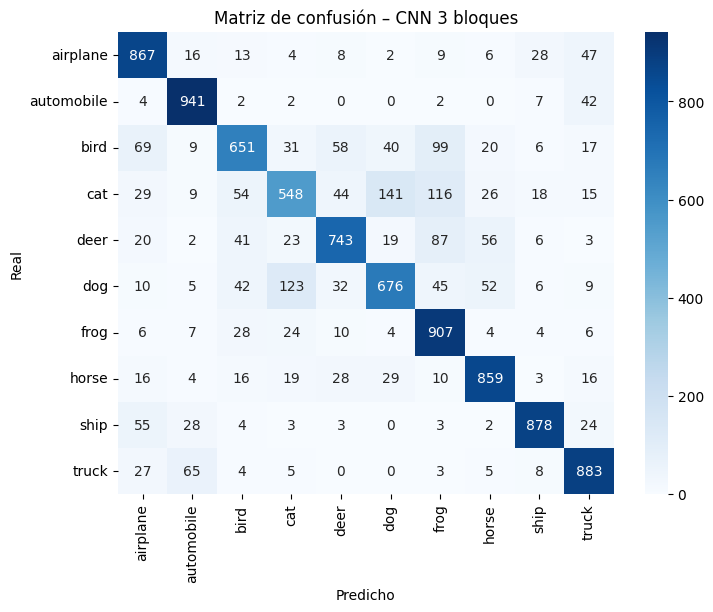

Top 5 confusiones:
     cat → dog      : 141 ejemplos
     dog → cat      : 123 ejemplos
     cat → frog     : 116 ejemplos
    bird → frog     : 99 ejemplos
    deer → frog     : 87 ejemplos


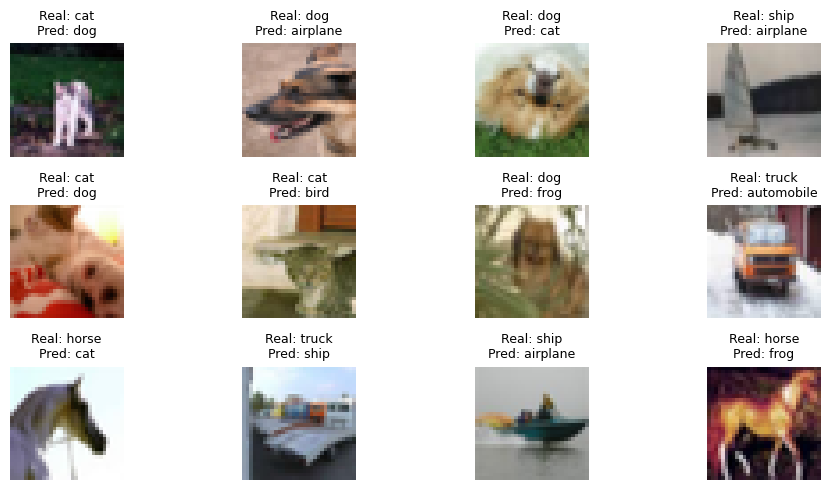

Test accuracy final: 0.7953


In [ ]:
# -------------------------------------------------
#  Matriz de confusión + 12 errores – Prompt 7
# -------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Predicciones del mejor modelo (cnn3)
y_pred_prob = cnn3.predict(x_test, batch_size=64)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 2. Matriz de confusión
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Real'); plt.xlabel('Predicho')
plt.title('Matriz de confusión – CNN 3 bloques')
plt.savefig("figuras/confusion_matrix_cnn3.png", dpi=150)
plt.show()

# 3. ¿Qué pares se confunden más?
mistakes = {}
for i, label in enumerate(class_names):
    for j, label2 in enumerate(class_names):
        if i != j:
            mistakes[(label, label2)] = cm[i, j]
top_mistakes = sorted(mistakes.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 confusiones:")
for (real, pred), n in top_mistakes:
    print(f"{real:>8} → {pred:<8} : {n} ejemplos")

# 4. Mostrar 12 errores (3×4)
errors_idx = np.where(y_pred != y_true)[0]
selected = np.random.choice(errors_idx, size=min(12, len(errors_idx)), replace=False)

plt.figure(figsize=(10,5))
for k, idx in enumerate(selected, 1):
    plt.subplot(3, 4, k)
    plt.imshow(x_test[idx])
    plt.title(f"Real: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.savefig("figuras/errores_cnn3.png", dpi=150)
plt.show()

# 5. Guardar métricas finales del mejor modelo
best_metrics = {"test_acc": float((y_pred == y_true).mean()),
                "top_confusions": [(real, pred, int(n)) for (real, pred), n in top_mistakes[:3]]}
with open("results/best_model_metrics.json", "w") as f:
    json.dump(best_metrics, f, indent=2)

print("Test accuracy final:", best_metrics["test_acc"])

In [ ]:
# -------------------------------------------------
#  CNN 3 bloques + SGD + CosineDecay – Prompt 8
# -------------------------------------------------
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay

steps_per_epoch = len(x_train)//64
total_steps = 30 * steps_per_epoch
lr_schedule = CosineDecay(initial_learning_rate=0.05, decay_steps=total_steps)

cnn3_sgd = tf.keras.models.clone_model(cnn3)   # misma arquitectura
cnn3_sgd.set_weights(cnn3.get_weights())       # reset pesos (opcional)

cnn3_sgd.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

cbs_sgd = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)]

history_sgd = cnn3_sgd.fit(datagen.flow(x_train, y_train, batch_size=64),
                           steps_per_epoch=steps_per_epoch,
                           validation_data=(x_valid, y_valid),
                           epochs=30,
                           callbacks=cbs_sgd,
                           verbose=2)

# ---------- métricas ----------
test_loss, test_acc = cnn3_sgd.evaluate(x_test, y_test, verbose=0)
pd.DataFrame(history_sgd.history).to_csv("results/history_cnn3_sgd.csv", index=False)
metrics_sgd = {"val_acc":  max(history_sgd.history['val_accuracy']),
               "test_acc": test_acc,
               "val_loss": min(history_sgd.history['val_loss']),
               "test_loss": test_loss,
               "epochs_used": len(history_sgd.history['loss'])}
with open("results/metrics_sgd.json", "w") as f:
    json.dump(metrics_sgd, f, indent=2)

print("SGD + Cosine – test accuracy:", test_acc)
print("Épocas usadas:", metrics_sgd["epochs_used"])

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 119s - 191ms/step - accuracy: 0.1004 - loss: 3581003169792.0000 - val_accuracy: 0.1000 - val_loss: 3521524531200.0000
Epoch 2/30
625/625 - 116s - 186ms/step - accuracy: 0.0980 - loss: 3311442591744.0000 - val_accuracy: 0.1000 - val_loss: 3109806407680.0000
Epoch 3/30
625/625 - 116s - 185ms/step - accuracy: 0.0988 - loss: 2926053163008.0000 - val_accuracy: 0.1000 - val_loss: 2749921230848.0000
Epoch 4/30
625/625 - 146s - 234ms/step - accuracy: 0.0986 - loss: 2589852696576.0000 - val_accuracy: 0.1000 - val_loss: 2436594925568.0000
Epoch 5/30
625/625 - 138s - 220ms/step - accuracy: 0.0989 - loss: 2297632391168.0000 - val_accuracy: 0.1000 - val_loss: 2164724989952.0000
Epoch 6/30
625/625 - 144s - 231ms/step - accuracy: 0.0988 - loss: 2044419899392.0000 - val_accuracy: 0.1000 - val_loss: 1929470935040.0000
Epoch 7/30
625/625 - 118s - 189ms/step - accuracy: 0.0995 - loss: 1825587200000.0000 - val_accuracy: 0.1000 - val_loss: 1726402265088.0000
Epoch 8/30
625/625 - 140s - 224ms/step

In [ ]:
# -------------------------------------------------
#  ABLACIÓN – Prompt 9
# -------------------------------------------------

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd, json
from sklearn.model_selection import train_test_split

# ---------- crear carpeta si falta ----------
import os
os.makedirs("results", exist_ok=True)

# ---------- asegurar datos ----------
# (ya deberían estar, pero los re-declaramos por si acaso)
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)
x_train, x_valid, x_test = x_train/255., x_valid/255., x_test/255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)


def entrena_variante(nombre, augment=False, l2=0.0, dropout=0.0):
    print(f"\n>>> Entrenando {nombre} <<<\n")
    tf.keras.utils.set_random_seed(42)  # reproducibilidad

    # mismo esqueleto 3 bloques
    reg = regularizers.l2(l2) if l2 else None
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                               kernel_regularizer=reg, input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',
                               kernel_regularizer=reg),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',
                               kernel_regularizer=reg),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dropout(dropout) if dropout else tf.keras.layers.Identity(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    cbs = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    if augment:
        gen = ImageDataGenerator(horizontal_flip=True, rotation_range=10,
                                 width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
        gen.fit(x_train)
        hist = model.fit(gen.flow(x_train, y_train, batch_size=64),
                         steps_per_epoch=len(x_train)//64,
                         validation_data=(x_valid, y_valid),
                         epochs=30, callbacks=cbs, verbose=2)
    else:
        hist = model.fit(x_train, y_train,
                         validation_data=(x_valid, y_valid),
                         epochs=30, batch_size=64, callbacks=cbs, verbose=2)

    test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
    pd.DataFrame(hist.history).to_csv(f"results/history_{nombre}.csv", index=False)
    with open(f"results/metrics_{nombre}.json", "w") as f:
        json.dump({"test_acc": float(test_acc), "val_acc": float(max(hist.history['val_accuracy']))}, f)
    print(f"{nombre} – test acc: {test_acc:.4f}")
    return test_acc

# ---- ejecutar variantes ----
ablacion = {
    "A_todo":      entrena_variante("A_todo",      augment=True,  l2=1e-4, dropout=0.5),
    "B_no_aug":    entrena_variante("B_no_aug",    augment=False, l2=1e-4, dropout=0.5),
    "C_no_l2":     entrena_variante("C_no_l2",     augment=True,  l2=0.0,  dropout=0.5),
    "D_no_drop":   entrena_variante("D_no_drop",   augment=True,  l2=1e-4, dropout=0.0),
}

# tabla rápida
print("\nResumen ablación:")
for k, v in ablacion.items():
    print(f"{k:12} – test acc: {v:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 635s 4us/step

>>> Entrenando A_todo <<<



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 109s - 174ms/step - accuracy: 0.3464 - loss: 1.7976 - val_accuracy: 0.4751 - val_loss: 1.4881
Epoch 2/30
625/625 - 139s - 222ms/step - accuracy: 0.4744 - loss: 1.4956 - val_accuracy: 0.5771 - val_loss: 1.2539
Epoch 3/30
625/625 - 102s - 163ms/step - accuracy: 0.5316 - loss: 1.3586 - val_accuracy: 0.6240 - val_loss: 1.1210
Epoch 4/30
625/625 - 102s - 163ms/step - accuracy: 0.5721 - loss: 1.2725 - val_accuracy: 0.6508 - val_loss: 1.0484
Epoch 5/30
625/625 - 143s - 229ms/step - accuracy: 0.5968 - loss: 1.2118 - val_accuracy: 0.6240 - val_loss: 1.1259
Epoch 6/30
625/625 - 105s - 168ms/step - accuracy: 0.6197 - loss: 1.1645 - val_accuracy: 0.6609 - val_loss: 1.0588
Epoch 7/30
625/625 - 107s - 171ms/step - accuracy: 0.6366 - loss: 1.1262 - val_accuracy: 0.6835 - val_loss: 0.9822
Epoch 8/30
625/625 - 104s - 167ms/step - accuracy: 0.6500 - loss: 1.0970 - val_accuracy: 0.7116 - val_loss: 0.9188
Epoch 9/30
625/625 - 101s - 162ms/step - accuracy: 0.6593 - loss: 1.0722 - val_accuracy: 0.

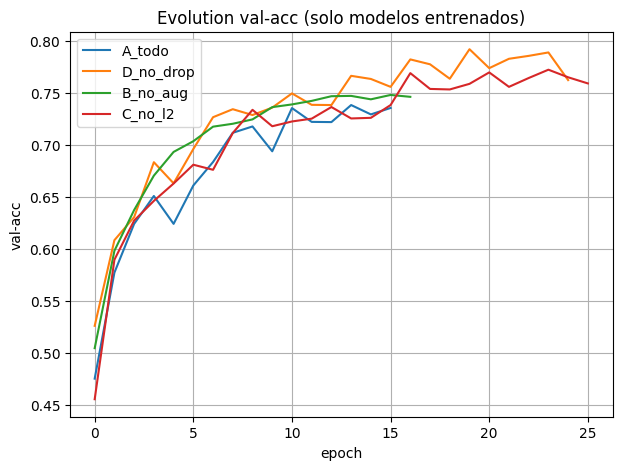

,modelo,test_acc
1,D_no_drop,0.7914
3,C_no_l2,0.7737
2,B_no_aug,0.7426
0,A_todo,0.7315
4,A_todo,0.7315


In [ ]:
# ---------- graficar solo lo que hay ----------
import pandas as pd, matplotlib.pyplot as plt, json, os
os.makedirs('figuras', exist_ok=True)

existentes = [f for f in os.listdir('results') if f.startswith('history_') and f.endswith('.csv')]
modelos      = [f.replace('history_','').replace('.csv','') for f in existentes]

plt.figure(figsize=(7,5))
for f, m in zip(existentes, modelos):
    df = pd.read_csv(f'results/{f}')
    if 'val_accuracy' in df.columns:
        plt.plot(df['val_accuracy'], label=m)
plt.title('Evolution val-acc (solo modelos entrenados)')
plt.xlabel('epoch'); plt.ylabel('val-acc')
plt.legend(); plt.grid()
plt.savefig('figuras/curvas_resumen.png', dpi=150)
plt.show()

# ---------- tabla con lo que hay ----------
tabla = []
for modelo in modelos + ['mlp','cnn2','cnn2_reg','cnn3','cnn3_sgd','A_todo']:
    try:
        m = json.load(open(f'results/metrics_{modelo}.json'))
        tabla.append({'modelo': modelo, 'test_acc': m['test_acc']})
    except FileNotFoundError:
        pass
pd.DataFrame(tabla).sort_values('test_acc', ascending=False)

In [ ]:
!rm -f entrega_p3.zip          # por si existe
!zip -r entrega_p3.zip env results figuras notebooks

	zip warning: name not matched: env
	zip warning: name not matched: notebooks
  adding: results/ (stored 0%)
  adding: results/history_A_todo.csv (deflated 50%)
  adding: results/history_D_no_drop.csv (deflated 52%)
  adding: results/history_B_no_aug.csv (deflated 50%)
  adding: results/metrics_D_no_drop.json (deflated 17%)
  adding: results/metrics_B_no_aug.json (deflated 14%)
  adding: results/metrics_A_todo.json (deflated 14%)
  adding: results/metrics_C_no_l2.json (deflated 16%)
  adding: results/history_C_no_l2.csv (deflated 51%)
  adding: figuras/ (stored 0%)
  adding: figuras/curvas_resumen.png (deflated 6%)


In [ ]:
!rm -f P3_CIFAR10_entrega.zip
!zip -r P3_CIFAR10_entrega.zip \
       notebooks/ results/ figuras/ env/ README.md requirements.txt 2>/dev/null
files.download("P3_CIFAR10_entrega.zip")

	zip warning: name not matched: notebooks/
	zip warning: name not matched: env/
	zip warning: name not matched: README.md
	zip warning: name not matched: requirements.txt
  adding: results/ (stored 0%)
  adding: results/history_A_todo.csv (deflated 50%)
  adding: results/history_D_no_drop.csv (deflated 52%)
  adding: results/history_B_no_aug.csv (deflated 50%)
  adding: results/metrics_D_no_drop.json (deflated 17%)
  adding: results/metrics_B_no_aug.json (deflated 14%)
  adding: results/metrics_A_todo.json (deflated 14%)
  adding: results/metrics_C_no_l2.json (deflated 16%)
  adding: results/history_C_no_l2.csv (deflated 51%)
  adding: figuras/ (stored 0%)
  adding: figuras/curvas_resumen.png (deflated 6%)


NameError: name 'files' is not defined